In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, RocCurveDisplay, classification_report

## Verilerin Gözden Geçirilmesi

**Sütunların Açıklaması**

AGE: (yıl cinsinden yaş)

Sex: (1 = erkek; 0 = kadın)

CP (göğüs ağrısı türü)

TRESTBPS (istirahat kan basıncı (hastaneye girişte mm Hg olarak))

CHOL (mg/dl cinsinden serum kolesterolü)

FPS (açlık şekeri > 120 mg/dl) (1 = doğru; 0 = yanlış)

RESTECH (dinlenme elektrokardiyografik sonuçları)

THALACH (maksimum kalp atış hızına ulaşıldı)

EXANG (egzersize bağlı anjina pektoris (1=evet; 0=hayır))

OLDPEAK (dinlenmeye karşı egzersize bağlı ST depresyonu)

EĞİM (efor sırasında tepe ST segmentinin eğimi)

CA (florosopi ile boyanmış ana damar sayısı (0-3))

THAL (3 = normal; 6 = sabit hata; 7 = geri döndürülebilir hata)

TARGET: (1 veya 0)

In [48]:
path = '/content/drive/MyDrive/Colab Notebooks/MachineLearning/Assignments/Assignment6/Dataset/heart.csv'
dataset = pd.read_csv(path)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [49]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [51]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [52]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Verilerin Grafik Üzerinde İncelenmesi

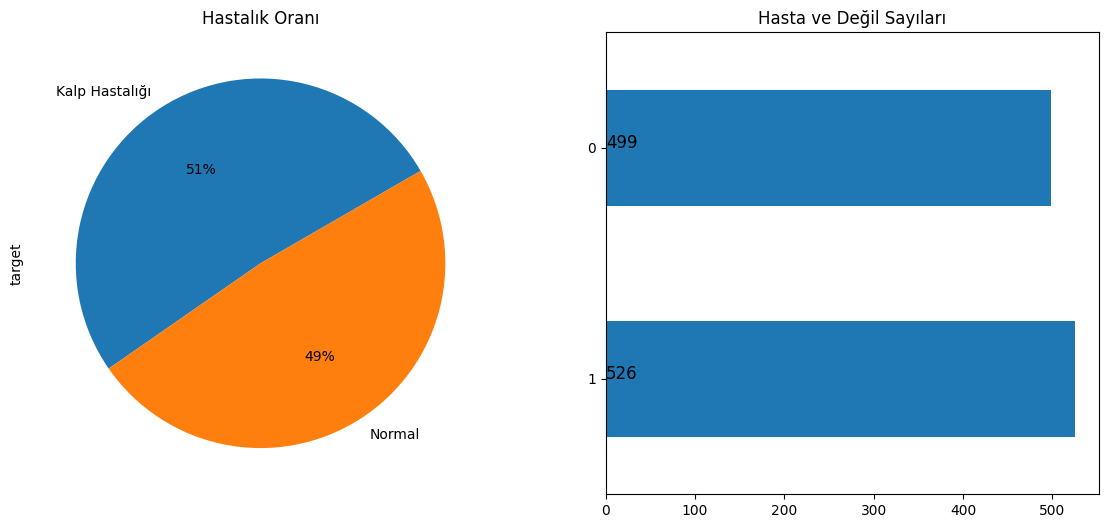

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dataset['target'].value_counts().plot.pie( 
    x="Kalp Hastalığı",
    y ='Hasta sayısı', 
    autopct = "%1.0f%%",
    labels=["Kalp Hastalığı","Normal"], 
    startangle = 30,
    ax=ax1
);
ax1.set(title = "Hastalık Oranı")

ax2 = dataset["target"].value_counts().plot(kind="barh" ,ax=ax2)

for i,j in enumerate(dataset["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
    
ax2.set(title = "Hasta ve Değil Sayıları")
plt.show()

Target sütununa göre satır dağılımları gösterilmiştir.

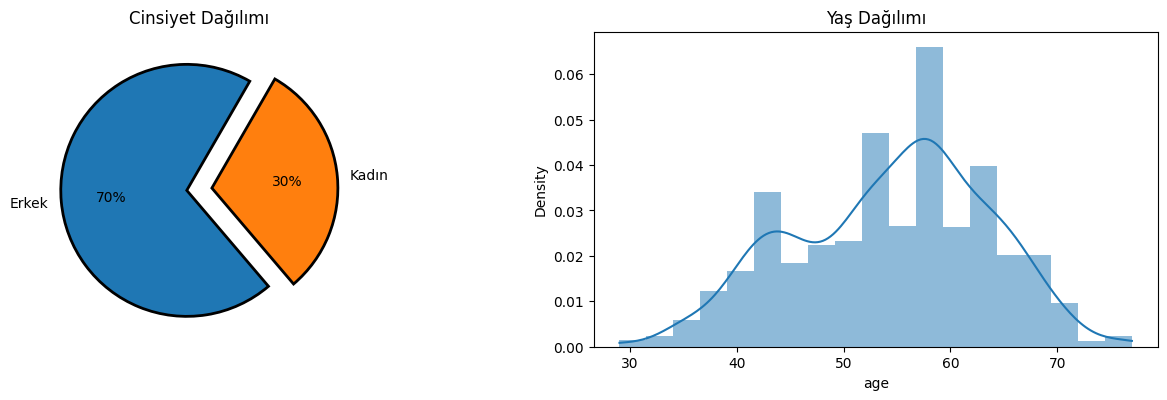

In [54]:
plt.figure(figsize=(16,9))
plt.subplot(221)
dataset["sex"].value_counts().plot.pie(
    autopct = "%1.0f%%",
    colors = sns.color_palette(),
    startangle = 60,
    labels=["Erkek","Kadın"],
    wedgeprops={"linewidth":2,"edgecolor":"k"},
    explode=[.1,.1],
    shadow =False,
    label=""
)

plt.title("Cinsiyet Dağılımı")
plt.subplot(222)
ax= sns.histplot(dataset['age'], kde=True, stat="density", linewidth=0, label="")
plt.title("Yaş Dağılımı")
plt.show()

Cinsiyet ve yaş dağılımları gösterilmiştir.

In [55]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [56]:
histogram_data = dataset.groupby("target")
histogram_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1


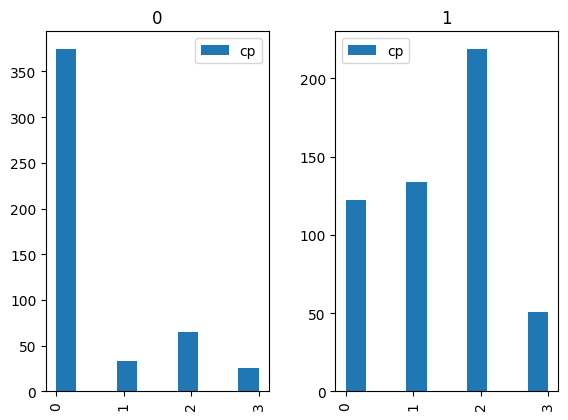

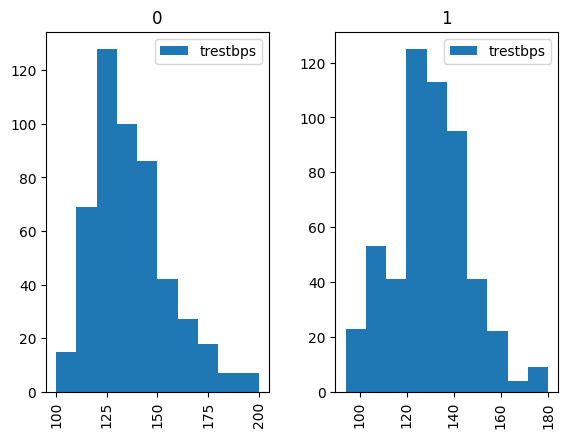

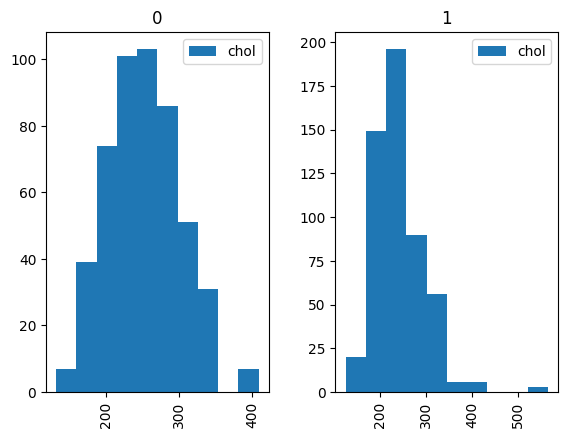

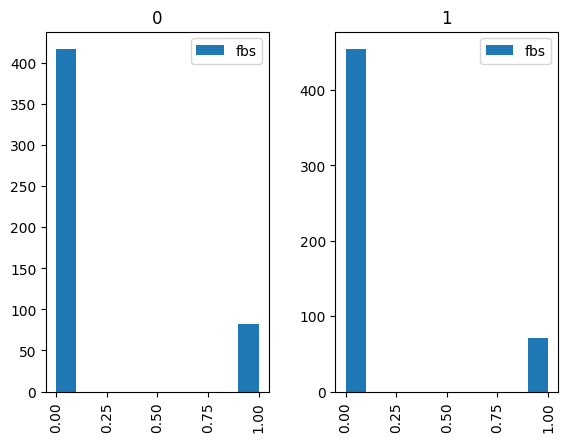

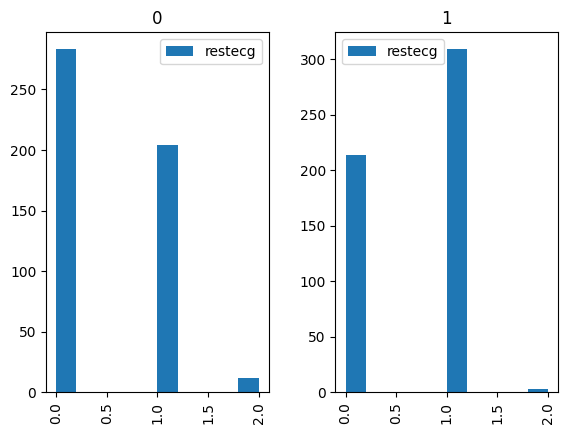

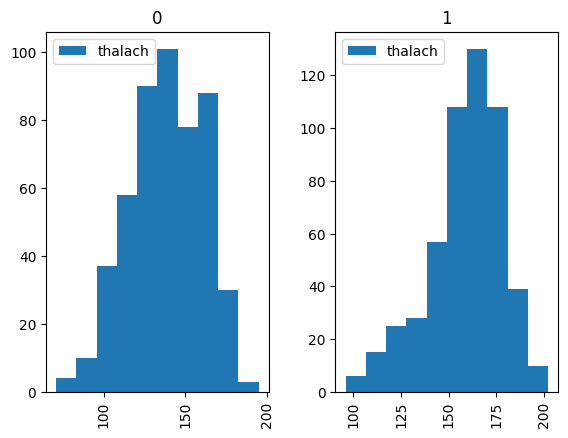

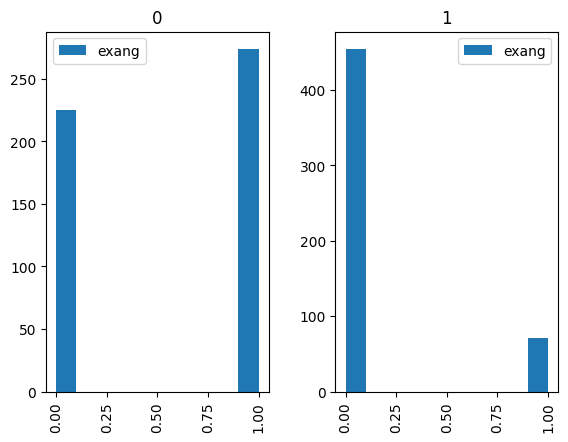

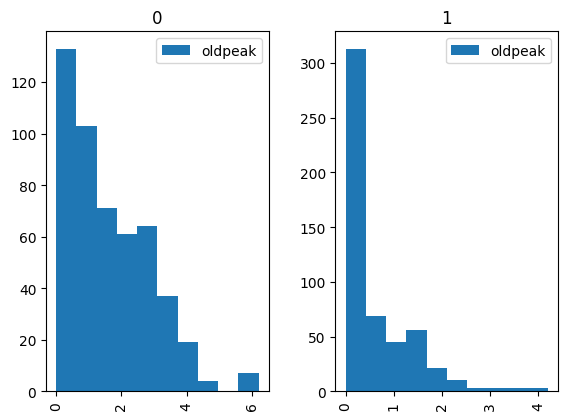

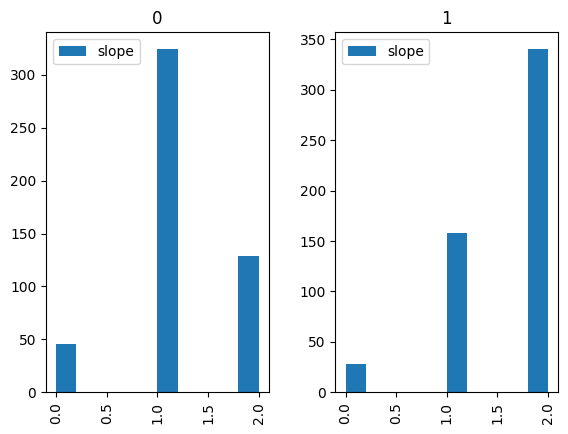

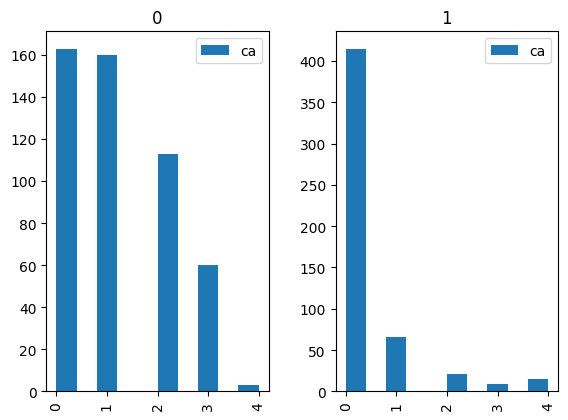

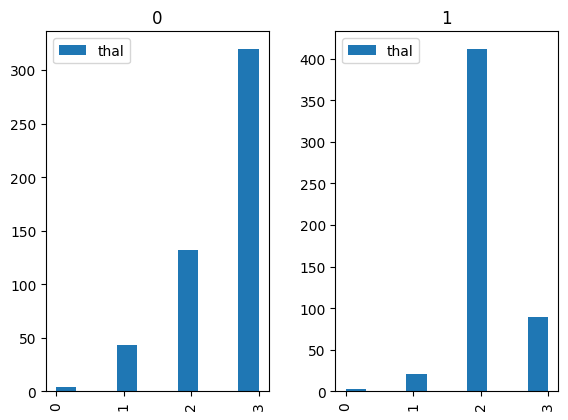

In [57]:
for i, column in enumerate(['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']):
  dataset[column].hist(by=dataset["target"], legend=True)

Her bir değişkenin target'a göre histogramları gösterilmiştir.

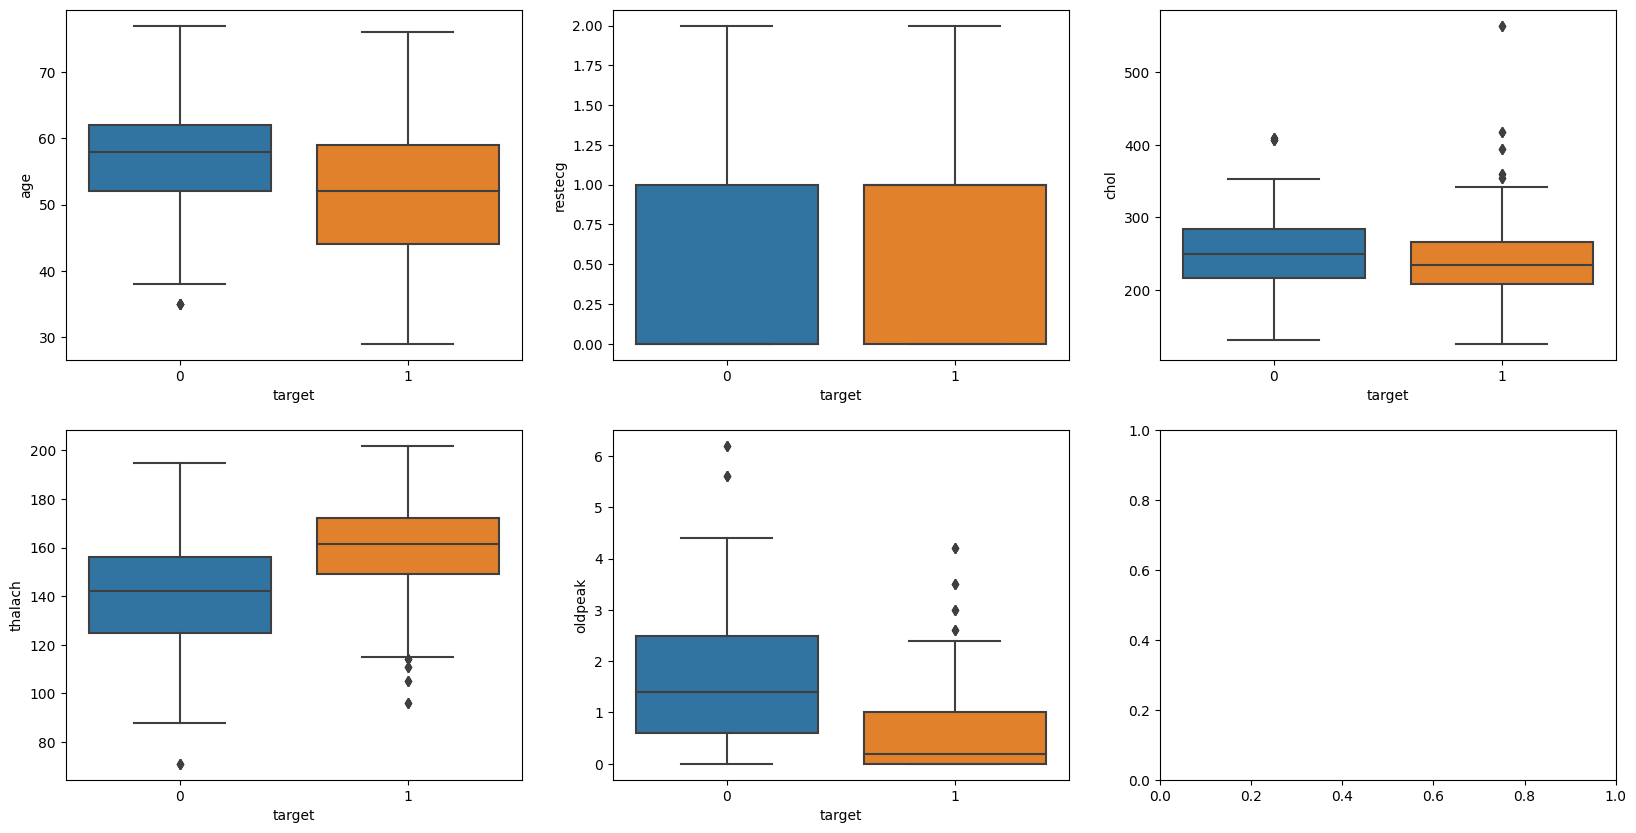

In [58]:
columns=["age","restecg","chol", "thalach","oldpeak"]
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for i, col in enumerate(columns):
    sns.boxplot(x="target", y=col, data=dataset, ax=ax[i//3][i%3])

Boxplot ile target'a aykırı değer gözlemi yapılmıştır.

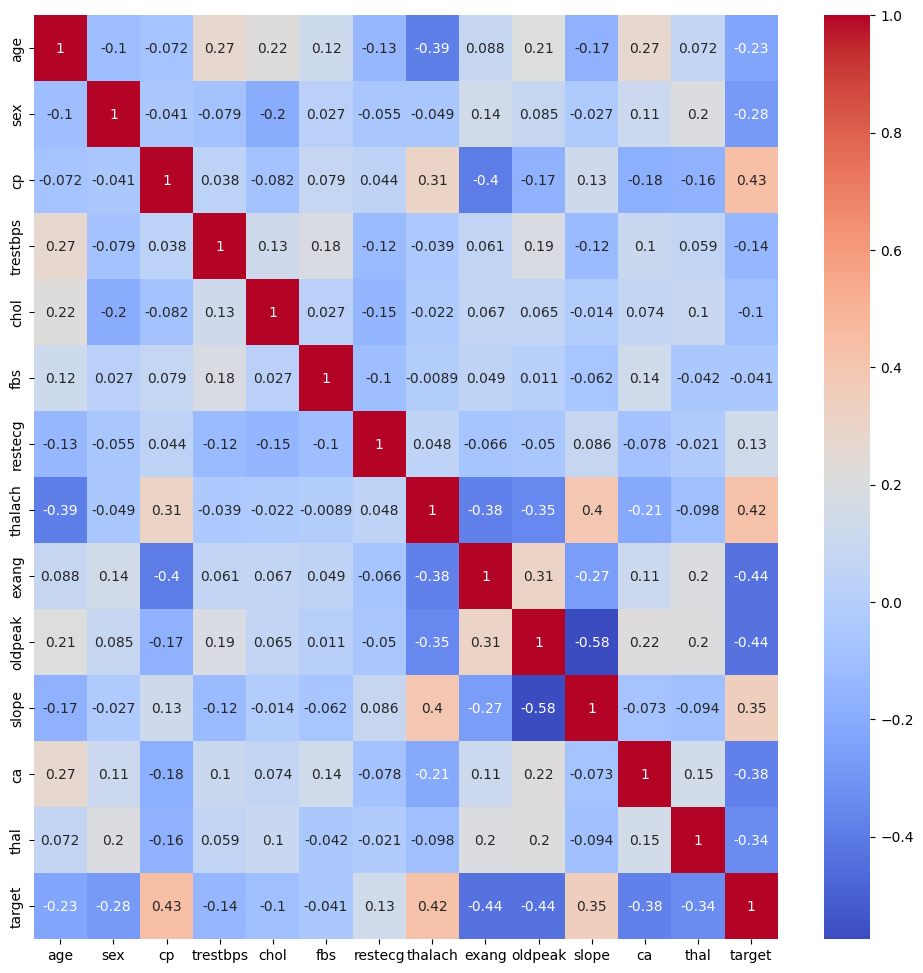

In [59]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm");

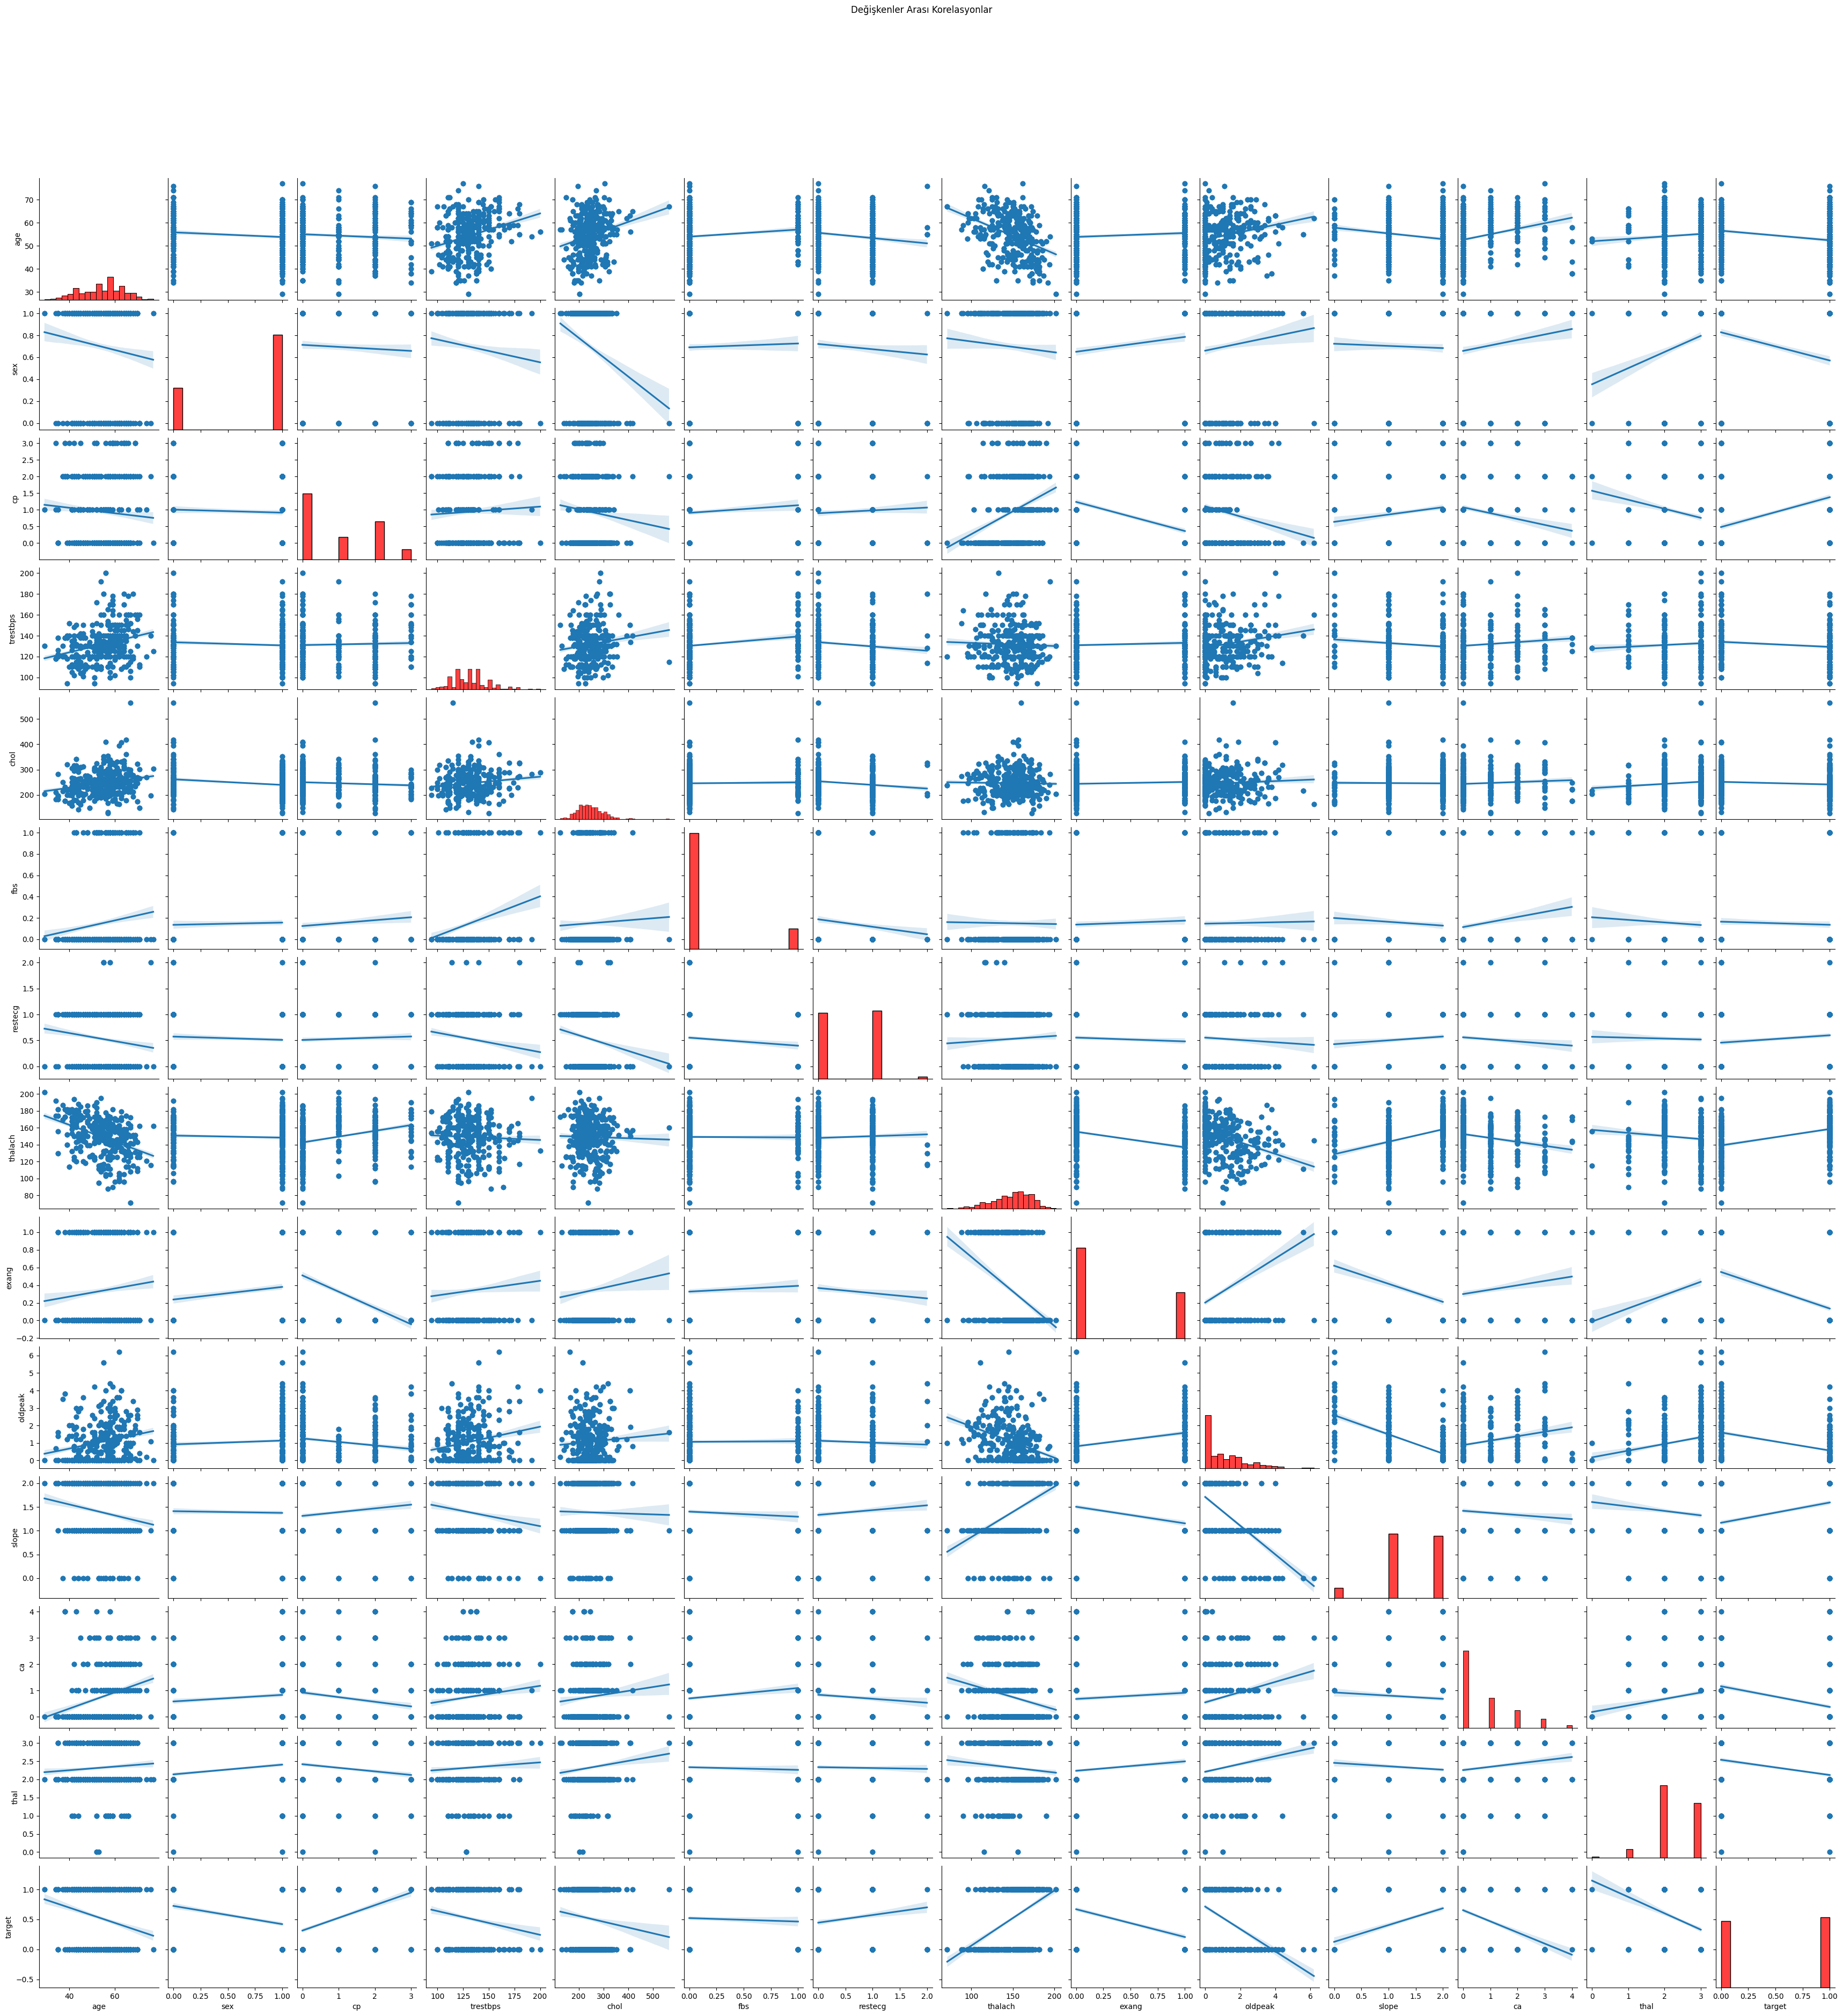

In [60]:
g= sns.pairplot(dataset ,kind="reg",diag_kws= {'color': 'red'})
g.fig.suptitle("Değişkenler Arası Korelasyonlar", y=1.08)
plt.show()

Heatmap ve scatterplot incelemelerinden sonra güçlü negatif veya pozitif bir korelasyon görülmemiştir.

## Modellerin oluşturulması

In [61]:
y = dataset['target']
X = dataset.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
def show_roc_curve(model, model_name, X_test, y_test):
  y_scores = model.predict_proba(X_test)
  fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
  roc_auc = auc(fpr, tpr)
  plt.title('Receiver Operating Characteristic of ' + model_name)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('ROC Curve of ' + model_name)
  plt.show()

In [64]:
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score'])

In [65]:
def add_scores(y_test, y_test_pred, model_name):
  acc = accuracy_score(y_test, y_test_pred)
  rec = recall_score(y_test, y_test_pred)
  prec = precision_score(y_test, y_test_pred)
  f1 = f1_score(y_test, y_test_pred)
  model_performance.loc[model_name] = [acc, rec, prec, f1]
  print(model_performance.sort_values("F1-Score", ascending=False))

### 1-) KNN

In [66]:
knn = KNeighborsClassifier(n_neighbors=3, p=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred, target_names = ['target 0', 'target 1']))

              precision    recall  f1-score   support

    target 0       0.90      0.95      0.93       159
    target 1       0.94      0.89      0.92       149

    accuracy                           0.92       308
   macro avg       0.92      0.92      0.92       308
weighted avg       0.92      0.92      0.92       308



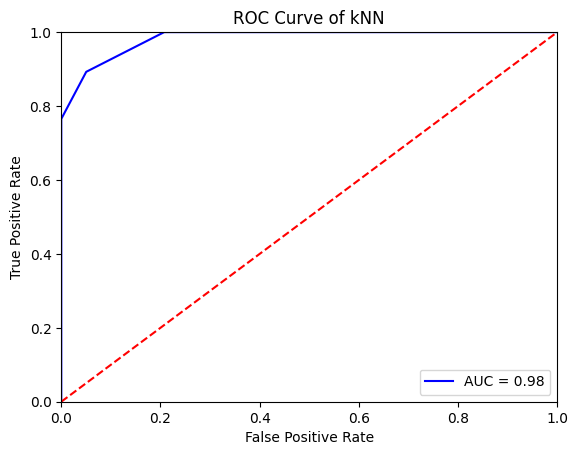

In [67]:
show_roc_curve(knn, "kNN", X_test, y_test)

In [68]:
add_scores(y_test, y_pred, 'kNN')

     Accuracy    Recall  Precision  F1-Score
kNN  0.922078  0.892617   0.943262  0.917241


### 2-) Logistic Regression

In [69]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred, target_names = ['target 0', 'target 1']))

              precision    recall  f1-score   support

    target 0       0.87      0.74      0.80       159
    target 1       0.76      0.89      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.81      0.81       308
weighted avg       0.82      0.81      0.81       308



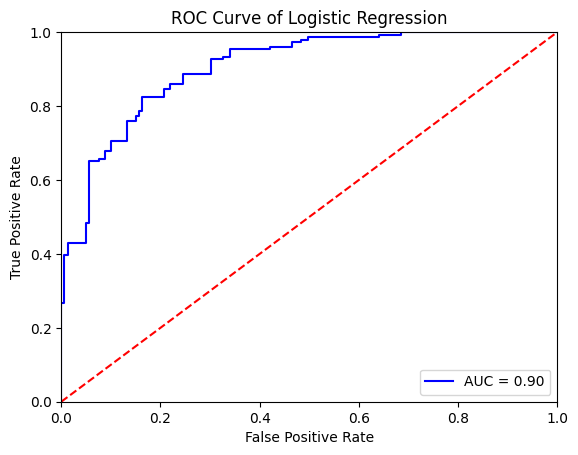

In [70]:
show_roc_curve(lr, "Logistic Regression", X_test, y_test)

In [71]:
add_scores(y_test, y_pred, 'Logistic Regression')

                     Accuracy    Recall  Precision  F1-Score
kNN                  0.922078  0.892617   0.943262  0.917241
Logistic Regression  0.808442  0.885906   0.758621  0.817337


## 3-) Naive Bayes

In [72]:
bNB = BernoulliNB()
bNB.fit(X_train, y_train)
y_pred = bNB.predict(X_test)
print(classification_report(y_test, y_pred, target_names = ['target 0', 'target 1']))

              precision    recall  f1-score   support

    target 0       0.90      0.80      0.85       159
    target 1       0.81      0.91      0.85       149

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.86      0.85      0.85       308



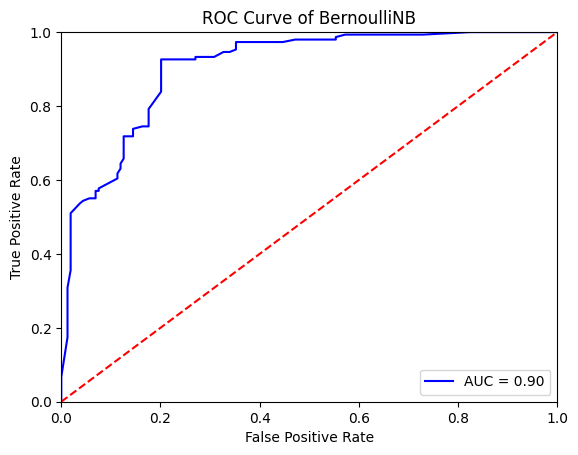

In [73]:
show_roc_curve(bNB, "BernoulliNB", X_test, y_test)

In [74]:
add_scores(y_test, y_pred, 'BernoulliNB')

                     Accuracy    Recall  Precision  F1-Score
kNN                  0.922078  0.892617   0.943262  0.917241
BernoulliNB          0.850649  0.906040   0.808383  0.854430
Logistic Regression  0.808442  0.885906   0.758621  0.817337


Bu veri seti için en iyi sonuç KNN algoritmasından alınmış olup F1 Skoru 0.91 ve AUC ise 0.98 ile diğerlerinden daha yüksektir.